In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

template match

fairly basic version of object recognition. 
find identical regions of an image that match a template we provide, giving a certain threshold.
works good with  - obejct matches with same lighting/scale/angle 

main image - onde vc vai procurar
template - exact object looking for

In [22]:
img_rgb = cv2.imread('data/opencv-template-matching-python-tutorial.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('data/opencv-template-for-matching.jpg',0)
w, h = template.shape[::-1]

res =  matchTemplate between the main image, the template, and then the matching method used. 
specify a threshold, i.e: 0.8 for 80%. Then we find locations with a logical statement, where the res > = 80%.

In [23]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.85
loc = np.where( res >= threshold)

 we mark all matches on the original image, using the coordinates we found in the gray image:

In [24]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)

In [25]:
#release para a imgem da opencv - obrigatório
cv2.waitKey(0)
cv2.destroyAllWindows()

Feature Matching (Homography) Brute Force

a imagem de templates tem diferentes: rotações, escalas, iluminação

utilizar "força bruta" para realizar a comparação. 
- encontrar todas as características em ambas imagens 
- comparar as características 

observação: We then can draw out as many as we want. Careful though. If you draw say 500 matches, you're going to have a lot of false positives. Draw the first few only

In [8]:
img1 = cv2.imread('data/opencv-feature-matching-template.jpg',0)
img2 = cv2.imread('data/opencv-feature-matching-image.jpg',0)

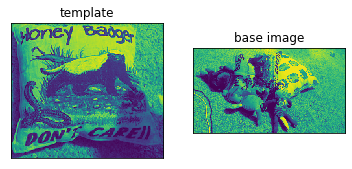

In [9]:
plt.subplot(121),plt.imshow(img1),plt.title('template')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2),plt.title('base image')
plt.xticks([]), plt.yticks([])

plt.show()

In [10]:
orb = cv2.ORB_create()

#read ORB: an efficient alternative to SIFT or SURF by Ethan Rublee Vincent Rabaud Kurt Konolige Gary Bradski


In [11]:
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [12]:
# find the key points and their descriptors with the orb detector.

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [13]:
# our BFMatcher object.

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

cv2.drawMatches(img1,kp1,img2,kp2,matches[:25],None, flags=2)

matches: quantidade de "pontos" analisados 
se o número for muito grande terá muitos falsos positivos
pequeno não fará correlação. 

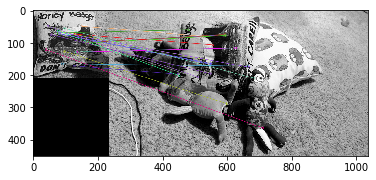

In [16]:
#create matches of the descriptors, then we sort them based on their distances.

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:25],None, flags=2)
plt.imshow(img3)
plt.show()